In [4]:
import os
import numpy as np
import xarray as xr

import downscale as down

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

In [22]:
DOWN_dir = os.path.join('..','data','down_test','down_parameters_test.nc')
PARAMS = xr.open_dataset(DOWN_dir)

lat = PARAMS['lat']
lon = PARAMS['lon']
lon2d, lat2d = np.meshgrid(lon, lat)

PARAMS

<xarray.Dataset> Size: 3kB
Dimensions:  (lat: 4, lon: 6)
Coordinates:
  * lat      (lat) float64 32B 31.75 32.25 32.75 33.25
  * lon      (lon) float64 48B -93.25 -92.75 -92.25 -91.75 -91.25 -90.75
Data variables: (12/15)
    eps_s    (lat, lon) float64 192B ...
    alp_s    (lat, lon) float64 192B ...
    mev_s    (lat, lon) float64 192B ...
    eps_d    (lat, lon) float64 192B ...
    alp_d    (lat, lon) float64 192B ...
    mev_d    (lat, lon) float64 192B ...
    ...       ...
    Nd       (lat, lon) float64 192B ...
    Cd       (lat, lon) float64 192B ...
    Wd       (lat, lon) float64 192B ...
    Ns       (lat, lon) float64 192B ...
    Cs       (lat, lon) float64 192B ...
    Ws       (lat, lon) float64 192B ...
Attributes:
    description:  MRI ESM2 precipitation for Atlantic Ocean

In [20]:
RT = np.zeros([len(lat), len(lon)])
for la in range(len(lat)):
    for lo in range(len(lon)):
        # RT[la,lo] = np.exp(-PARAMS['eps_s'][la,lo].data*50/PARAMS['alp_s'][la,lo].data)
        RT[la,lo] = (PARAMS['eps_s'][la,lo].data/np.exp(1)/50)**PARAMS['alp_s'][la,lo].data

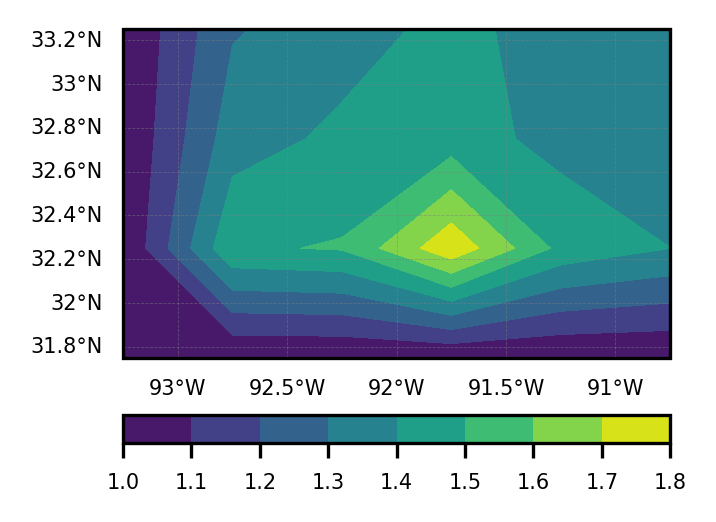

In [24]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,5),dpi=300)
gs = gridspec.GridSpec(1,3)

# =======================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.3,color='grey')
ax1.add_feature(cf.BORDERS,linewidth=0.3,color='grey')
# ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
a1 = ax1.contourf(lon2d, lat2d, RT)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

cbar = plt.colorbar(a1, fraction=0.04, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=5)

In [10]:
down.epl_fun(xx, PARAMS['eps_s'][0,0], PARAMS['alp_s'][0,0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])